# Fraud Loan Prediction

Whether to give loan to a person or not based on the information .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
#Load the data
df=pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.drop(['Loan_ID'],axis=1,inplace=True)  #Since it is not required

In [4]:
df.shape

(614, 12)

In [5]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
#Find the null values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

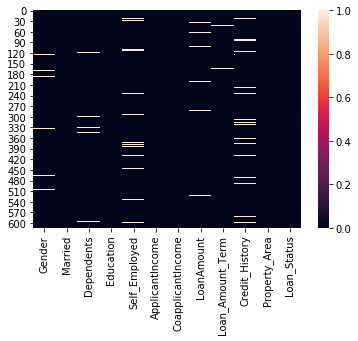

In [10]:
sns.heatmap(df.isnull())

In [11]:
#filling the missing values for numeric cols
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [12]:
#fill the missing values for categorical cols
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [13]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
#create new column
df['Total_Income']=df['ApplicantIncome'] + df['CoapplicantIncome']

In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


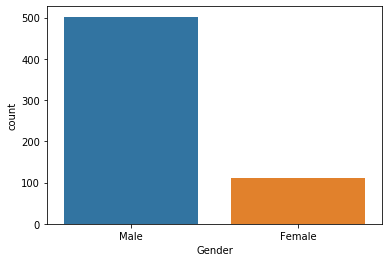

In [16]:
sns.countplot(df['Gender'])
#Majority of the applicants are Male

In [17]:
df[df['Loan_Status']=='Y']['Gender'].value_counts(normalize='True')*100
#More Male applicants are granted loans

Male      82.227488
Female    17.772512
Name: Gender, dtype: float64

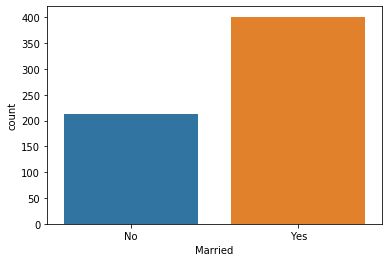

In [18]:
sns.countplot(df['Married'])
#Majority of the applicants are Married

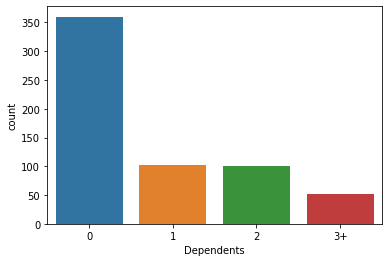

In [19]:
sns.countplot(df['Dependents'])
#Majority of the applicants have zero dependents

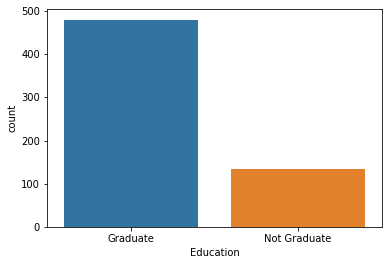

In [20]:
sns.countplot(df['Education'])
#Majority of the applicants are Graduates

In [21]:
df[df['Loan_Status']=='Y']['Education'].value_counts(normalize='True')*100
#Graduated has higher proportion of loan approval

Graduate        80.56872
Not Graduate    19.43128
Name: Education, dtype: float64

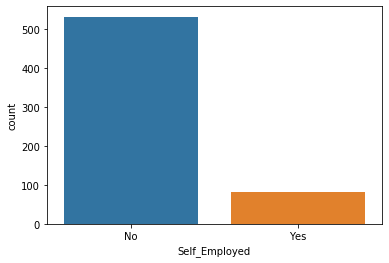

In [22]:
sns.countplot(df['Self_Employed'])
#Majority of the applicants are not Self_Employed

In [23]:
df[df['Loan_Status']=='Y']['Self_Employed'].value_counts(normalize='True')*100
#Self employed applicants are more likely to be granted loans

No     86.729858
Yes    13.270142
Name: Self_Employed, dtype: float64

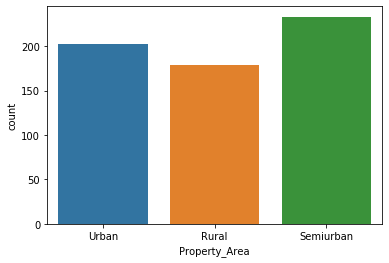

In [24]:
sns.countplot(df['Property_Area'])
#Majority of the property is in Semi urban area

In [25]:
df[df['Loan_Status']=='Y']['Property_Area'].value_counts(normalize='True')*100
#More applicants from semi urban area are likely to be granted loans

Semiurban    42.417062
Urban        31.516588
Rural        26.066351
Name: Property_Area, dtype: float64

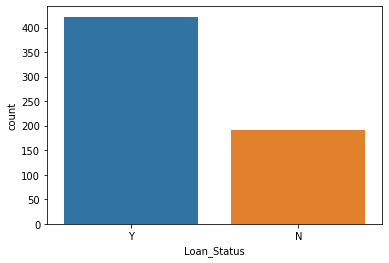

In [26]:
sns.countplot(df['Loan_Status'])
#majority of the applicants are granted loans

In [27]:
df[df['Loan_Status']=='Y']['Loan_Amount_Term'].value_counts(normalize='True')*100
#Majority of the loans are taken for 360 Months i.e. (30 years)

360.0    85.071090
180.0     6.872038
300.0     1.895735
342.0     1.895735
480.0     1.421801
84.0      0.710900
240.0     0.710900
120.0     0.710900
60.0      0.473934
12.0      0.236967
Name: Loan_Amount_Term, dtype: float64

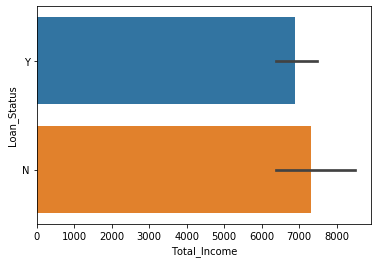

In [28]:
sns.barplot(x='Total_Income',y='Loan_Status',data=df)

In [29]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Total_Income         5.633449
dtype: float64

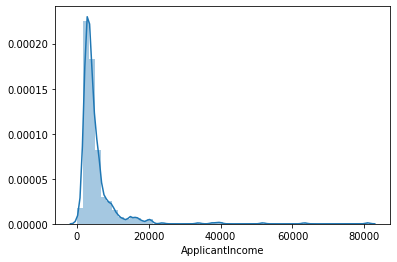

In [30]:
sns.distplot(df['ApplicantIncome'])
#data is skewed

In [31]:
#apply Log transformation to the attribute
df['ApplicantIncome']=np.log(df['ApplicantIncome'])

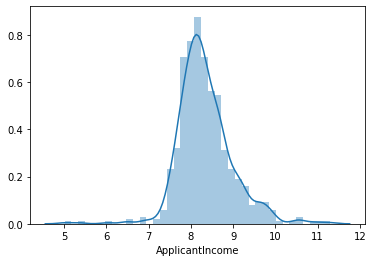

In [32]:
sns.distplot(df['ApplicantIncome'])

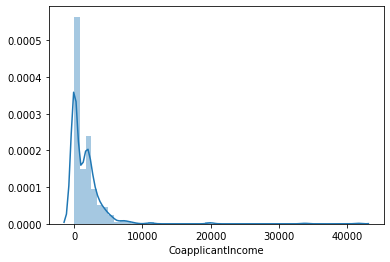

In [33]:
sns.distplot(df['CoapplicantIncome'])

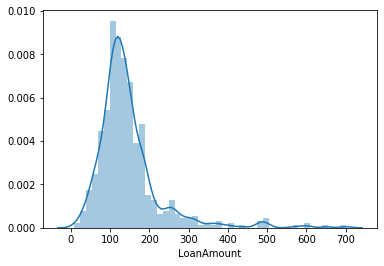

In [34]:
sns.distplot(df['LoanAmount'])

In [35]:
df['LoanAmount']=np.log(df['LoanAmount'])

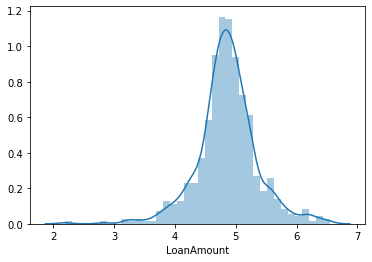

In [36]:
sns.distplot(df['LoanAmount'])

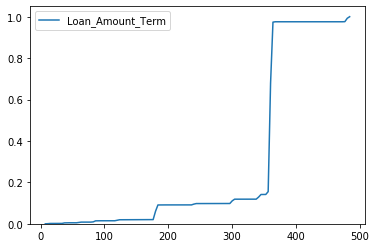

In [37]:
sns.kdeplot(df['Loan_Amount_Term'], cumulative=True, bw=1.5)

In [38]:
df['Loan_Amount_Term']=np.log(df['Loan_Amount_Term'])

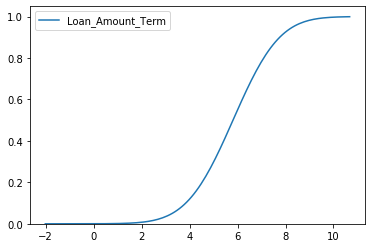

In [39]:
sns.kdeplot(df['Loan_Amount_Term'],cumulative=True, bw=1.5)

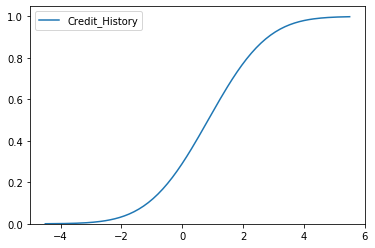

In [40]:
sns.kdeplot(df['Credit_History'], cumulative=True, bw=1.5)

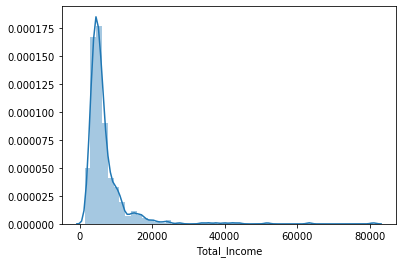

In [41]:
sns.distplot(df['Total_Income'])

In [42]:
df['Total_Income']=np.log(df['Total_Income'])

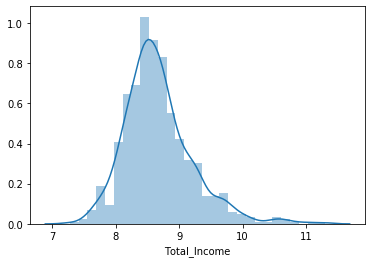

In [43]:
sns.distplot(df['Total_Income'])

In [44]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
ApplicantIncome,1.000000,-0.237900,0.491066,-0.014618,0.019169,0.740300
CoapplicantIncome,-0.237900,1.000000,0.204179,-0.042941,-0.001665,0.383827
LoanAmount,0.491066,0.204179,1.000000,0.084534,-0.025248,0.657507
Loan_Amount_Term,-0.014618,-0.042941,0.084534,1.000000,-0.007860,-0.029522
Credit_History,0.019169,-0.001665,-0.025248,-0.007860,1.000000,0.019156
Total_Income,0.740300,0.383827,0.657507,-0.029522,0.019156,1.000000


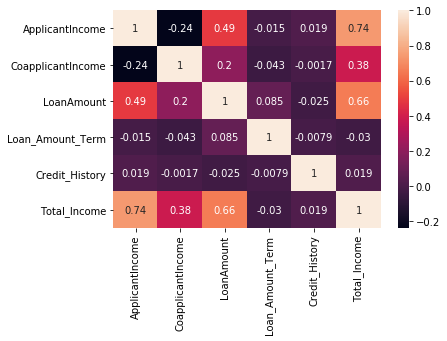

In [45]:
sns.heatmap(df.corr(),annot=True)

In [46]:
df.drop(['Gender','Dependents','Self_Employed','Loan_Amount_Term','Property_Area'],axis='columns',inplace=True)

In [47]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
cols=df
for col in df.columns:
    if df[col].dtype ==np.object:
        df[col]=LabelEncoder().fit_transform(df[col])

In [48]:
#Splitting input and output variables
y = df['Loan_Status']
x = df.drop(['Loan_Status'],axis=1)

In [49]:
x.head()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Total_Income
0,0,0,8.674026,0.0,4.986426,1.0,8.674026
1,1,0,8.430109,1508.0,4.852030,1.0,8.714568
2,1,0,8.006368,0.0,4.189655,1.0,8.006368
3,1,1,7.856707,2358.0,4.787492,1.0,8.505323
4,0,0,8.699515,0.0,4.948760,1.0,8.699515


In [50]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
x= sc.fit_transform(x)

In [51]:
#Importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc


In [52]:
max_acc_score=0
for i in range(42,101):
    r_state=i
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("The accuracy score for",i, " is" ,acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
        
print("The maximum accuracy score ",final_r_state," is ",max_acc_score)     

The accuracy score for 42  is 0.7886178861788617
The accuracy score for 43  is 0.8130081300813008
The accuracy score for 44  is 0.8373983739837398
The accuracy score for 45  is 0.7723577235772358
The accuracy score for 46  is 0.8373983739837398
The accuracy score for 47  is 0.8130081300813008
The accuracy score for 48  is 0.7642276422764228
The accuracy score for 49  is 0.8211382113821138
The accuracy score for 50  is 0.7886178861788617
The accuracy score for 51  is 0.8373983739837398
The accuracy score for 52  is 0.8211382113821138
The accuracy score for 53  is 0.7723577235772358
The accuracy score for 54  is 0.8373983739837398
The accuracy score for 55  is 0.7317073170731707
The accuracy score for 56  is 0.8373983739837398
The accuracy score for 57  is 0.7967479674796748
The accuracy score for 58  is 0.8048780487804879
The accuracy score for 59  is 0.8130081300813008
The accuracy score for 60  is 0.8130081300813008
The accuracy score for 61  is 0.8130081300813008
The accuracy score f

In [53]:
#Finalizing the tain_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=63,test_size=0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(491, 7)
(491,)
(123, 7)
(123,)


In [55]:
#best parameters for KNN

from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
grid_param ={'n_neighbors':range(1,30)}
gd=GridSearchCV(knn,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 22}

In [56]:
#best parameters for DecisionTree

dtc=DecisionTreeClassifier()
grid_param ={'criterion': ['gini', 'entropy']}
gd=GridSearchCV(dtc,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}

In [57]:
#best parameters for SVC

svc = SVC()
grid_param ={'kernel': ('linear','poly','rbf'), 'C':[1,10]}
gd=GridSearchCV(svc,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'C': 1, 'kernel': 'poly'}

In [58]:
#best parameters for RandomForest

rfc=RandomForestClassifier()
grid_param={"n_estimators":[10,100,500,1000]}
gd=GridSearchCV(rfc,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'n_estimators': 500}



Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is: 0.8780487804878049


The CV Score is 0.809462881514061


[[20 15]
 [ 0 88]]


              precision    recall  f1-score   support

           0       1.00      0.57      0.73        35
           1       0.85      1.00      0.92        88

    accuracy                           0.88       123
   macro avg       0.93      0.79      0.82       123
weighted avg       0.90      0.88      0.87       123



roc_auc_score 0.7857142857142857


AxesSubplot(0.125,0.808774;0.62x0.0712264)


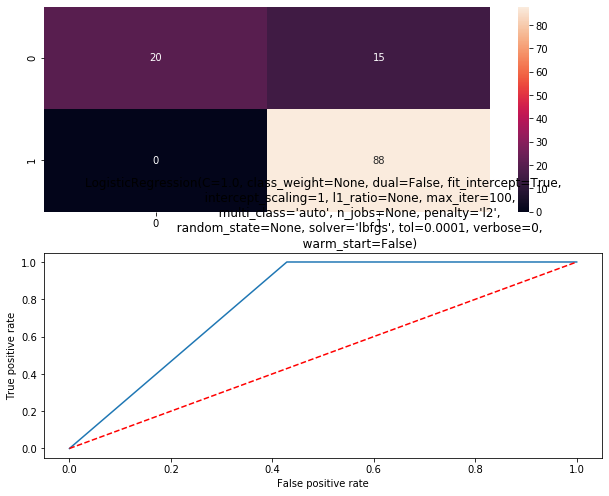



Accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform') is: 0.8780487804878049


The CV Score is 0.8078368652538984


[[20 15]
 [ 0 88]]


              precision    recall  f1-score   support

           0       1.00      0.57      0.73        35
           1       0.85      1.00      0.92        88

    accuracy                           0.88       123
   macro avg       0.93      0.79      0.82       123
weighted avg       0.90      0.88      0.87       123



roc_auc_score 0.7857142857142857


AxesSubplot(0.125,0.808774;0.62x0.0712264)


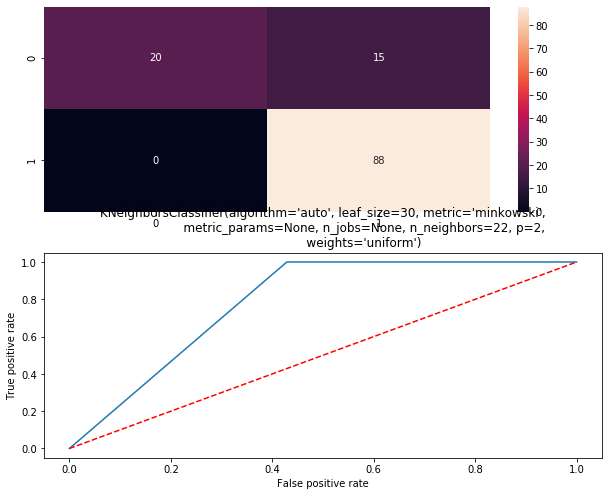



Accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 0.7886178861788617


The CV Score is 0.7198987071837932


[[27  8]
 [18 70]]


              precision    recall  f1-score   support

           0       0.60      0.77      0.68        35
           1       0.90      0.80      0.84        88

    accuracy                           0.79       123
   macro avg       0.75      0.78      0.76       123
weighted avg       0.81      0.79      0.80       123



roc_auc_score 0.7834415584415585


AxesSubplot(0.125,0.808774;0.62x0.0712264)


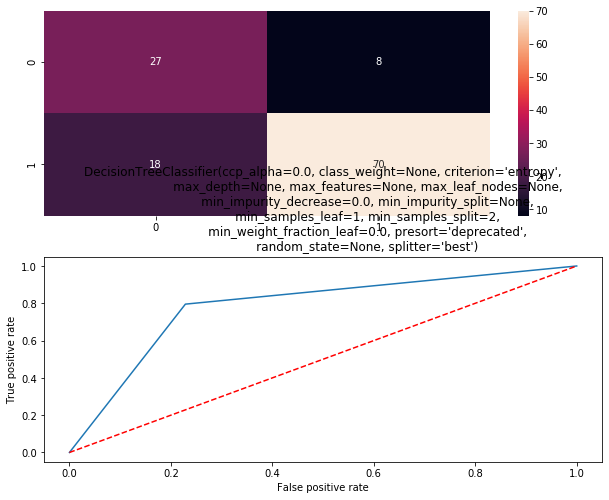



Accuracy score of SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is: 0.8780487804878049


The CV Score is 0.8094762095161936


[[20 15]
 [ 0 88]]


              precision    recall  f1-score   support

           0       1.00      0.57      0.73        35
           1       0.85      1.00      0.92        88

    accuracy                           0.88       123
   macro avg       0.93      0.79      0.82       123
weighted avg       0.90      0.88      0.87       123



roc_auc_score 0.7857142857142857


AxesSubplot(0.125,0.808774;0.62x0.0712264)


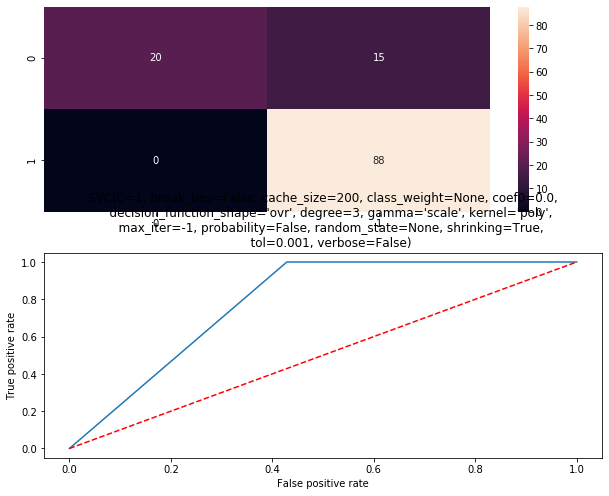



Accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=63, verbose=0,
                       warm_start=False) is: 0.8699186991869918


The CV Score is 0.7866586698653871


[[23 12]
 [ 4 84]]


              precision    recall  f1-score   support

           0       0.85      0.66      0.74        35
           1       0.88      0.95      0.91        88

    accuracy                           0.87       123
   macro avg       0.86      0.81      0.83       123
weighted avg       0.87      0.87      0.86       123



roc_auc_score 0.8058441

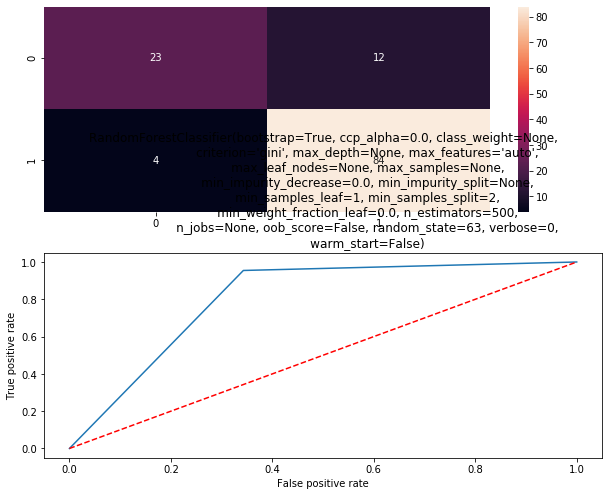



Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is: 0.8536585365853658


The CV Score is 0.8029721444755431


[[21 14]
 [ 4 84]]


              precision    recall  f1-score   support

           0       0.84      0.60      0.70        35
           1       0.86      0.95      0.90        88

    accuracy                           0.85       123
   macro avg       0.85      0.78      0.80       123
weighted avg       0.85      0.85      0.85       123



roc_auc_score 0.7772727272727272


AxesSubplot(0.125,0.808774;0.62x0.0712264)


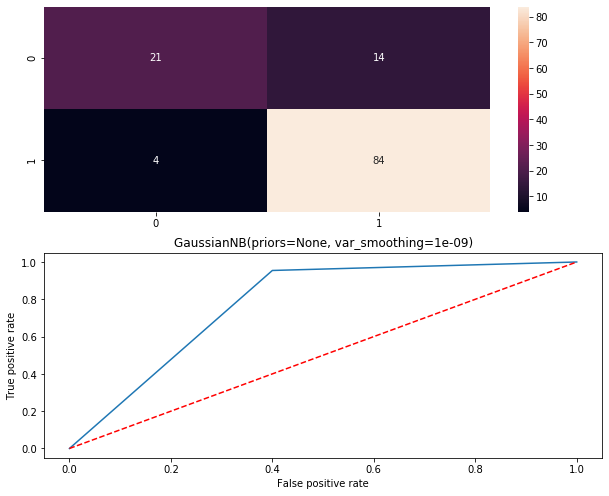

In [59]:
#Testing the models with the best parameters calculated

model=[]
score=[]
cvs=[]
rocscore=[]

for i in [LogisticRegression(),KNeighborsClassifier(n_neighbors=22),DecisionTreeClassifier(criterion='entropy'),SVC(kernel='poly',C=1),RandomForestClassifier(n_estimators=500,random_state=63),GaussianNB()]:
    model.append(i)
    print('\n')
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    pred=i.predict(x_test)
    ac=accuracy_score(y_test,pred)
    print('Accuracy score of',i,'is:',ac)
    score.append(ac)
    print('\n')
    cv_score=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    print('The CV Score is', cv_score)
    cvs.append(cv_score)
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()

In [60]:
result=pd.DataFrame({'Model':['LogisticRegresssion','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GausianNB'],'Accuracy_Score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,LogisticRegresssion,0.878049,0.809463,0.785714
1,SVC,0.878049,0.807837,0.785714
2,KNeighborsClassifier,0.788618,0.719899,0.783442
3,DecisionTreeClassifier,0.878049,0.809476,0.785714
4,RandomForestClassifier,0.869919,0.786659,0.805844
5,GausianNB,0.853659,0.802972,0.777273


Since LogisticRegression,DTC are giving better results,we finalize logisticregression

In [61]:
from sklearn.externals import joblib
joblib.dump(lg,"Loan.lg")

['Loan.lg']